<a href="https://colab.research.google.com/github/robajo12/data301_predictive_analytics_machine_learning/blob/main/ml_projects/COVID19_Testing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Testing Project

 Build a model to predict the number of positive Covid-19 cases among latino  people from a Covid-19 daily testing dataset.



# Environment Set up

Importation of all required libraries needed for data analysis. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Data Acquisition

Collection of the dataset for data analysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/COVID-19_Daily_Testing.csv')

In [ ]:
df.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [ ]:
df.shape

(89, 59)

In [ ]:
df.columns

Index(['Date', 'Day', 'Tests', 'Cases', 'People Not-Positive - Total',
       'People Tested - Age 0-17', 'People Tested - Age 18-29',
       'People Tested - Age 30-39', 'People Tested - Age 40-49',
       'People Tested - Age 50-59', 'People Tested - Age 60-69',
       'People Tested - Age 70-79', 'People Tested - Age 80+',
       'People Tested - Age Unknown', 'People Tested - Female',
       'People Tested - Male', 'People Tested - Gender Unknown',
       'People Tested - Latinx', 'People Tested - Asian Non-Latinx',
       'People Tested - Black Non-Latinx', 'People Tested - White Non-Latinx',
       'People Tested - Other Race Non-Latinx',
       'People Tested - Unknown Race/Ethnicity', 'People Positive - Age 0-17',
       'People Positive - Age 18-29', 'People Positive - Age 30-30',
       'People Positive - Age 40-49', 'People Positive - Age 50-59',
       'People Positive - Age 60-69', 'People Positive - Age 70-79',
       'People Positive - Age 80+', 'People Positive - Age Un

# Data Wrangling and EDA 


In [ ]:
# check if there is any missing values
df.isnull().sum()

Date                                            1
Day                                             1
Tests                                           0
Cases                                           0
People Not-Positive - Total                     0
People Tested - Age 0-17                        0
People Tested - Age 18-29                       0
People Tested - Age 30-39                       0
People Tested - Age 40-49                       0
People Tested - Age 50-59                       0
People Tested - Age 60-69                       0
People Tested - Age 70-79                       0
People Tested - Age 80+                         0
People Tested - Age Unknown                     0
People Tested - Female                          0
People Tested - Male                            0
People Tested - Gender Unknown                  0
People Tested - Latinx                          0
People Tested - Asian Non-Latinx                0
People Tested - Black Non-Latinx                0


In [ ]:
# Dropping columns day and Date.
df=df.drop(columns=['Date','Day'])

In [ ]:
df.head()

,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [ ]:
X = df[['Cases',
       'People Tested - Age 0-17', 'People Tested - Age 18-29',
       'People Tested - Age 30-39', 'People Tested - Age 40-49',
       'People Tested - Age 50-59', 'People Tested - Age 60-69',
       'People Tested - Age 70-79', 'People Tested - Age 80+',
       'People Tested - Age Unknown']]
X.head()

,Cases,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown
0,0,0,0,1,0,0,0,0,0,0
1,705,129,470,458,458,412,281,128,94,1
2,772,260,805,833,685,604,471,253,171,16
3,1,4,2,0,4,3,2,0,2,0
4,3,1,5,1,3,3,2,2,0,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Cases                        89 non-null     object
 1   People Tested - Age 0-17     89 non-null     int64 
 2   People Tested - Age 18-29    89 non-null     object
 3   People Tested - Age 30-39    89 non-null     object
 4   People Tested - Age 40-49    89 non-null     int64 
 5   People Tested - Age 50-59    89 non-null     int64 
 6   People Tested - Age 60-69    89 non-null     int64 
 7   People Tested - Age 70-79    89 non-null     int64 
 8   People Tested - Age 80+      89 non-null     int64 
 9   People Tested - Age Unknown  89 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 7.1+ KB


In [ ]:
# removing commas from numerics value
X = X.replace(',','', regex=True)
X.head()


,Cases,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown
0,0,0,0,1,0,0,0,0,0,0
1,705,129,470,458,458,412,281,128,94,1
2,772,260,805,833,685,604,471,253,171,16
3,1,4,2,0,4,3,2,0,2,0
4,3,1,5,1,3,3,2,2,0,1


In [ ]:
y= df[['People Positive - Latinx']]
y.head()

,People Positive - Latinx
0,0
1,343
2,319
3,0
4,0


In [ ]:
X.shape

(89, 10)

In [ ]:
y.shape

(89, 1)

# Build Linear Regression and train the model

In [ ]:
# import the library for linear regression
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [ ]:
# import library for training 
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3) if I want to define the test size to 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.3)

In [ ]:
# printing shapes of the trained and tested datasets
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(62, 10) (27, 10) (62, 1) (27, 1)


In [ ]:
# fit the training sets into the model
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the estimated intercept 
print(linReg.intercept_)

[-27.07730328]


In [ ]:
# print the coefficient of the linear regression.
print(linReg.coef_)

[[ 0.51069057  0.73871913  0.33809818 -0.49585328  0.10133649 -0.09879867
  -0.16640192  0.01883097 -0.0467406   0.29150791]]


# Calculate RMSE and R square

In [ ]:
#import metrics library and calculate mean of squared errors(mse)
from sklearn import metrics


In [ ]:
# model evaluation for testing set
y_pred = linReg.predict(X_test)
y_pred

array([[127.1590836 ],
       [-23.60789533],
       [ 80.84878382],
       [415.79401034],
       [127.7090856 ],
       [-23.8921334 ],
       [121.55793051],
       [133.96600595],
       [ 75.74288947],
       [  1.55304145],
       [475.52323116],
       [-23.25287491],
       [356.00966352],
       [434.25051201],
       [ 55.91245369],
       [125.19960638],
       [172.96905804],
       [246.38258262],
       [ -5.01268593],
       [545.23852637],
       [568.13018256],
       [-18.59774643],
       [505.71535751],
       [  1.63650914],
       [262.734433  ],
       [ 38.83600211],
       [117.59898948]])

In [ ]:
print('Actual Values', y_test.values[0:10])

Actual Values [[ 88]
 [  0]
 [ 21]
 [403]
 [120]
 [  0]
 [ 89]
 [ 99]
 [ 71]
 [ 24]]


In [ ]:
print('predicted value', y_pred[0:10])

predicted value [[127.1590836 ]
 [-23.60789533]
 [ 80.84878382]
 [415.79401034]
 [127.7090856 ]
 [-23.8921334 ]
 [121.55793051]
 [133.96600595]
 [ 75.74288947]
 [  1.55304145]]


In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mse

959.0086987415964

In [ ]:
rmse= np.sqrt(mse)
print('RMSE = {}'.format(rmse))

RMSE = 30.96786558259378


In [ ]:
r2 = metrics.r2_score(y_test,y_pred)
print('R2 = {}'.format(r2))

R2 = 0.9738193540022132


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


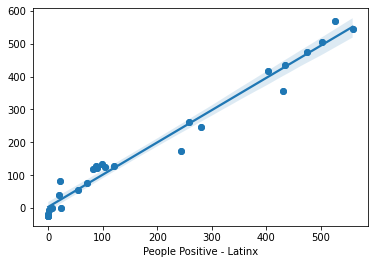

In [ ]:
plt.scatter(y_test,y_pred)
regplot = sns.regplot(y_test, y_pred,x='y_test', y='y_pred')

# Conclusion


  R squarred value obtained show that 97% of the data fit the regression model.
So, we conclude that the model is able to estimate a very close prediction to the testing data set.
